# Sessional 2 Solution
# Linear regression with multiple variables

So far, we have seen the concept of simple linear regression where a single feature $x_1$ (variable) 
was used to model the output variable (target) $\hat{y}$. In many applications, there
is more than one feature that influences the response (output). Multiple regression models
thus describe how a single response variable $\hat{y}$depends linearly on a number of
input features (variables).

#### Examples:

- The selling price of a house can depend on the desirability of the location, the number of bedrooms, the number of bathrooms, the year the house was built, the square footage of the lot and a number of other factors.
- The height of a child can depend on the height of the mother, the height of the father, nutrition, and environmental factors.

Let we have the input feature vector $x\in \Re^{n\times 1}$ then the estimated output  $\hat{y}$ is given by the following model.  
 $\hat{y}=w^Tx+b$
 
where $w\in \Re^{n\times 1}$, and $b\in\Re$ are the paramater to be estimated. Thus the cost function $J(w,b)$ is given by:  
$J(w,b)=\frac{1}{2m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$


## Gradient Descent Algorithm
Our objective is to  minimize cost function $J(w,b)$ for $w$ and $b$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update:

1.  Initailize $\alpha$, $w_1$, $b$ and $error$
2. $while(j(w_1,b)>error:$  
  $for$ $j=1$ $to$ $n$::

   $Tempw_j=w_j-\frac{\alpha}{m}\sum_{i=1}^m(w^Tx^{(i)}+b-y^{(i)})x_j^{(i)}$

   $b=b-\frac{\alpha}{m}\sum_{i=1}^m(w^Tx^{(i)}+b-y^{(i)})$  
  $for$ $j=1$ $to$ $n$:  
     $w_j=Tempw_j$
       
In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house

### Reading  The data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data2.txt', header = None) #read from dataset
m=len(data)
X=np.zeros((m,2))
Y=np.zeros((m,1))
X[:,0:2] = data.iloc[:,0:2] # read first 2 column
Y[:,0:1] = data.iloc[:,2:3] # read third column
#m = len(Y) # number of training example
data.head() # view first few rows of the data

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Setting Dimensions
As we discussed in the class that the input should be of the form $X\in\Re^{n\times m}$, where $n$ represents the number of features and $m$ represents the number of records. In other words, the columns of the input matrix $X$ contain the records or data instances. Similarly, the output should be of the form $Y\in\Re^{1\times m}$. In the following lines of code the data is converted to the required from.

In [3]:
X=np.transpose(X)
Y=np.transpose(Y)
print("The dimension of X=", np.shape(X))
print("The dimension of Y=", np.shape(Y))

The dimension of X= (2, 47)
The dimension of Y= (1, 47)


## Feature Normalization
Observe the values of dataset. By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly. There are different methods to perform normalization. The normalization may be pefromed as follows:  

- Subtract the mean value of each feature from the dataset. (1) compute the mean (average) of each feature ( i.e. column). (2) subtract the mean value form each value of the given column
-  After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.  
In the followig function you need to implemet the normalization.

The data normalization is performed in the following code.



In [4]:
def mean_normalization(X,Y):
    X = (X - np.mean(X))/np.std(X)
    Y = (Y - np.mean(Y))/np.std(Y)    
    return X,Y

X,Y=mean_normalization(X,Y)


### Cost function $J(w,b)$:  
We know that the cost function is given by:  
$J(w,b)=\frac{1}{2m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$.

In the following code the cost function is implemented using the concept of code vectorization (as we discussed in the class).

In [6]:
def cost(X,Y,w,b,m):
    J=np.sum(np.power(np.dot(w.T,X)+b-Y,2))/(2*m)
    return J
b=3
w=np.array([[2,3]]).T
print(cost(X,Y,w,b,m))


2.531122287850086


### Vectorized implementation of gradient descent algorithm.

Let $X\in\Re^{n\times m}$, $Y\in\Re^{1\times m}$, $w\in\Re^{n\times 1}$, $b\in\Re$, represent the input feature matrix, target labels, the weights and bais respectively.  Then gradient descent is given by:

- repeat until convergence:  
    $w=w-\frac{\alpha}{m}((w^TX+b-Y)X^T)^T$  
    $b=b-\frac{\alpha}{m}||(w^TX+b-Y)||_1$
    
    where $||\cdot||_1$ represents the sum of the elements of the vector
    

In [7]:
def gradientdescent(X,Y,w,b,a,m,iterations):
    J_history =[]
    it=1
    while(it<iterations):
        w=w-a*(np.dot((np.dot(w.T,X)+b-Y),X.T)).T/m
        b=b-a*np.sum(np.dot(w.T,X)+b-Y)/m
        J=cost(X,Y,w,b,m)
        J_history.append(J)
        it+=1
    return w,b,np.array(J_history)

In [8]:
b=2
a=0.001
iterations=1000
w=np.array([[1,2]]).T
print(np.shape(w))
w,b,J=gradientdescent(X,Y,w,b,a,m,iterations)
print(np.shape(w))

(2, 1)
(2, 1)


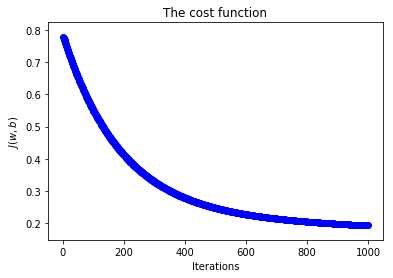

In [9]:
# Ploting the cost function
import matplotlib.pyplot as plt
it=np.arange(1,np.size(J)+1)
plt.scatter(it, J, marker='o', c='b')
plt.title('The cost function')
plt.xlabel('Iterations')
plt.ylabel('$J(w,b)$')
plt.show()